In [16]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.naive_bayes as NB
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

In [17]:
# Load & Show some rows of dataset
dataset = pd.read_csv('BreastCancer.csv').dropna(axis = 0)
dataset.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


In [18]:
# Separate features & targets
y_data = dataset['Class']
x_data = dataset.drop(['Class'], axis=1)

# Apply normalization techniques [0, 1]
for column in x_data:
    dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())

# Separate train & test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=42)

# Separate valid & test data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Show some rows of dataset after normalization
dataset.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.069946,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0
1,0.070164,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,0
2,0.071096,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,0
3,0.071160,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000,0
4,0.071216,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,0
5,0.071223,0.777778,1.000000,1.000000,0.777778,0.666667,1.000000,0.888889,0.666667,0.000000,1
6,0.071296,0.000000,0.000000,0.000000,0.000000,0.111111,1.000000,0.222222,0.000000,0.000000,0
7,0.071331,0.111111,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0
8,0.072415,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.444444,0
9,0.072415,0.333333,0.111111,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0


Accuracy of each validation: 
[0.94949495 0.96938776 0.92857143 0.97959184 0.91836735]

Total accuracy: 
	 0.9562043795620438

[[76  3]
 [ 3 55]]
True Negatives(TN) =  76
True Positives(TP) =  55
False Positives(FP) =  3
False Negatives(FN) =  3


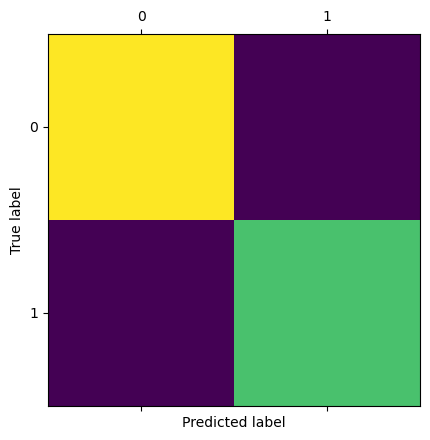

In [19]:
# Fit Naive Bayes model
Multi_naive_bayes = NB.MultinomialNB()
classifier = Multi_naive_bayes.fit(x_train, y_train)
score = cross_val_score(classifier, x_train, y_train, cv = 5)
print(f"Accuracy of each validation: \n{score}\n")

# Prediction on test data
predict_NB = Multi_naive_bayes.predict(x_test)
accuracy = accuracy_score(y_test, predict_NB)
print(f"Total accuracy: \n\t {accuracy}\n")

# Calc. & print Confusion Matrix
ConfusionMatrix = confusion_matrix(y_test, predict_NB)
print(ConfusionMatrix)
print('True Negatives(TN) = ', ConfusionMatrix[0,0])
print('True Positives(TP) = ', ConfusionMatrix[1,1])
print('False Positives(FP) = ', ConfusionMatrix[0,1])
print('False Negatives(FN) = ', ConfusionMatrix[1,0])
plt.matshow(ConfusionMatrix)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

accuracy of each validation: 
[0.84848485 0.87755102 0.7755102  0.86734694 0.84693878]

total accuracy: 
	 0.8029197080291971

[[79  0]
 [27 31]]
True Negatives(TN) =  79
True Positives(TP) =  31
False Positives(FP) =  0
False Negatives(FN) =  27


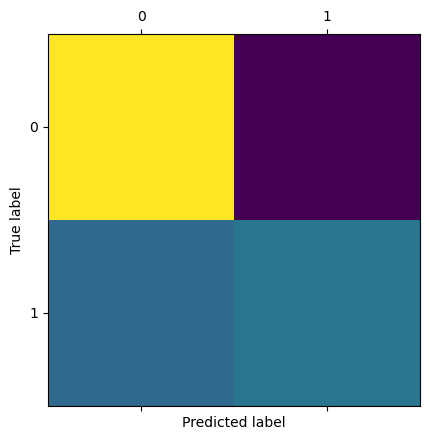

In [20]:
# Fit Gaussian Naive Bayes model
Gaussian_naive_bayes = NB.GaussianNB()
classifier = Gaussian_naive_bayes.fit(x_train, y_train)
score = cross_val_score(classifier, x_train, y_train, cv=5)
print(f"accuracy of each validation: \n{score}\n")

# Prediction on test data
predict_GNB = Gaussian_naive_bayes.predict(x_test)
accuracy = accuracy_score(y_test, predict_GNB)
print(f"total accuracy: \n\t {accuracy}\n")

# Calc. & print Confusion Matrix
ConfusionMatrix = confusion_matrix(y_test, predict_GNB)
print(ConfusionMatrix)
print('True Negatives(TN) = ', ConfusionMatrix[0,0])
print('True Positives(TP) = ', ConfusionMatrix[1,1])
print('False Positives(FP) = ', ConfusionMatrix[0,1])
print('False Negatives(FN) = ', ConfusionMatrix[1,0])

plt.matshow(ConfusionMatrix)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()